In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [2]:
traindf = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
moviedf = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
testdf = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
print("traindf",traindf.shape)
print("moviedf",moviedf.shape)
print("testdf",testdf.shape)

traindf (162758, 5)
moviedf (143258, 14)
testdf (55315, 4)


# First Look at the dataset

In [3]:
traindf.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [4]:
moviedf.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


 **Merging the "train" dataframe and the "movie" dataframe into one.**

In [5]:
finaldf = pd.merge(moviedf,traindf, on='movieid')

In [6]:
finaldf.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType,reviewerName,isFrequentReviewer,reviewText,sentiment
0,james_bond_courageous,James Bond Courageous,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Leroy Fernandes,$31.4M,STX Films,NaN,Karen Hamilton,False,This is nowhere near the level of other great ...,POSITIVE
1,james_bond_courageous,James Bond Courageous,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Leroy Fernandes,$31.4M,STX Films,NaN,Jessica Best,False,If you're feeling adventurous and looking for ...,POSITIVE
2,james_bond_courageous,James Bond Courageous,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Leroy Fernandes,$31.4M,STX Films,NaN,Rebekah Gomez,False,"Mercifully, Vincent Cassel provides a strong l...",POSITIVE
3,james_bond_courageous,James Bond Courageous,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Leroy Fernandes,$31.4M,STX Films,NaN,Paul Sullivan,False,Like the storm that destroys the best laid pla...,POSITIVE
4,james_bond_courageous,James Bond Courageous,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Leroy Fernandes,$31.4M,STX Films,NaN,Stacey Malone,True,Less a proper coming-of-age movie than a posh ...,NEGATIVE


# Imports

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

#Performance measures
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score,average_precision_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve


#exploratory analysis imports
import re
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

**TAKING ONLY THE REVIEWS AND SENTIMENT FURTHER**
Sampling 3000 randomly from the processingdf for exploratory analysis 

In [8]:
processingdf = finaldf[['reviewText','sentiment']]
explorationdf = processingdf.sample(n=3000)
processingdf.head()

,reviewText,sentiment
0,This is nowhere near the level of other great ...,POSITIVE
1,If you're feeling adventurous and looking for ...,POSITIVE
2,"Mercifully, Vincent Cassel provides a strong l...",POSITIVE
3,Like the storm that destroys the best laid pla...,POSITIVE
4,Less a proper coming-of-age movie than a posh ...,NEGATIVE


# Processing the review
* Lowercasing the text of the review
* Allowing only words and whitespaces
* Removing Stop-words
* Removing punctuations 
* Removing NaNs and duplicates
* Mapping 'POSITIVE' sentiment to 1 and 'NEGATIVE' to 0

In [9]:
processingdf['sentiment'] = processingdf['sentiment'].map({'NEGATIVE':0,'POSITIVE':1})
processingdf.head()

/tmp/ipykernel_20/732679947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processingdf['sentiment'] = processingdf['sentiment'].map({'NEGATIVE':0,'POSITIVE':1})


,reviewText,sentiment
0,This is nowhere near the level of other great ...,1
1,If you're feeling adventurous and looking for ...,1
2,"Mercifully, Vincent Cassel provides a strong l...",1
3,Like the storm that destroys the best laid pla...,1
4,Less a proper coming-of-age movie than a posh ...,0


In [10]:
processingdf = processingdf.dropna(subset=['reviewText','sentiment'])
processingdf = processingdf.drop_duplicates(subset=['reviewText','sentiment'])
explorationdf = explorationdf.dropna(subset=['reviewText','sentiment'])
explorationdf = explorationdf.drop_duplicates(subset=['reviewText','sentiment'])

In [11]:
def preprocessor(review):
    
    #lowercasing the review
    review = review.lower()
    
    punctuations = '''!()-[]{};:\,<>./?@#$%^&*_~'''
    
    #removing punctuation
    review = re.sub(r'[^\w\s]','',review)
    
    review = review.replace("there's","there is").replace("theres","there is").replace("shouldn't","should not").replace("couldn't","could not").replace("wouldn't","would not").replace("can't","cannot").replace(',','').replace('doesnt','does not').replace("doesn't","does not").replace("youre","you are").replace("isnt","is not").replace("you're","you are").replace("isn't","is not").replace("theres","there is").replace('cant','cannot')

    #removing stop words
    stop_words = [
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
    'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
    'can', 'could',
    'did', 'do', 'does', 'doing', 'down', 'during',
    'each',
    'few', 'for', 'from', 'further',
    'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how',
    'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself',
    'just',
    'me', 'more', 'most', 'my', 'myself',
    'no', 'nor', 'not', 'now',
    'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
    'same', 'she', 'should', 'so', 'some', 'such',
    'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this',
    'those', 'through', 'to', 'too',
    'under', 'until', 'up', 'us',
    'very',
    'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with',
    'you', 'your', 'yours', 'yourself', 'yourselves','much'
                ]
    review = re.sub(r'\d+', '', review)

    filtered = []
    for word in review.split():
        if word.lower() not in stop_words:
            if word not in punctuations:
                filtered.append(word)
    filtered_review = ' '.join(filtered)
    return filtered_review

In [12]:
processingdf['reviewText'] = processingdf['reviewText'].apply(preprocessor)
explorationdf['reviewText'] = explorationdf['reviewText'].astype('str').apply(preprocessor)

In [13]:
processingdf.head()

,reviewText,sentiment
0,nowhere near level great survival stories enou...,1
1,feeling adventurous looking another kind super...,1
2,mercifully vincent cassel provides strong life...,1
3,like storm destroys best laid plans couple sea...,1
4,less proper comingofage movie posh version hom...,0


# Splitting the dataset into training and test sets

**Using Stratified Shuffle Split**

In [14]:
x = processingdf['reviewText']
y = processingdf['sentiment']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [15]:
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.reset_index(drop=True)[train_index], x.reset_index(drop=True)[test_index]
    y_train, y_test = y.reset_index(drop=True)[train_index], y.reset_index(drop=True)[test_index]

# Dummy Classifier as a test classifier

In [16]:
dummy_classifier = DummyClassifier(strategy='most_frequent')

In [17]:
dummy_classifier.fit(x_train,y_train)

DummyClassifier(strategy='most_frequent')

In [18]:
dummy_pred = dummy_classifier.predict(x_test)
accuracy = accuracy_score(y_test,dummy_pred)
print(f'The accuracy for dummy classifier is {accuracy}') 

The accuracy for dummy classifier is 0.6699767861748774


# **Exploratory Data Analysis**

# 1 . Bar Plot to detect imbalanced data

In [19]:
x_exp = explorationdf['reviewText']
y_exp = explorationdf['sentiment']

In [20]:
positives = explorationdf[explorationdf['sentiment'] == 'POSITIVE']
negatives = explorationdf[explorationdf['sentiment'] == 'NEGATIVE']
print(positives.shape)
print(negatives.shape)

(1325, 2)
(710, 2)


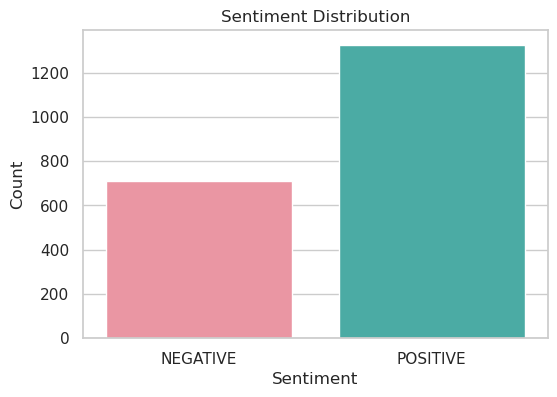

In [21]:
bar_color = '#1f78b4'
custom_palette = [bar_color]
sns.set(style='whitegrid', palette=custom_palette)
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=explorationdf)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Insight 1 : 
* Sentiment Label Distribution is evidently imbalanced
* Number of Positive Reviews is roughly double the number of Negative Reviews

-----------------------------------------------------------------------------------------------------

# 2 . Wordclouds for detecting words with higher frequency

In [22]:
positiveR = processingdf[processingdf['sentiment'] == 1]
negativeR = processingdf[processingdf['sentiment'] == 0]
positiveR = positiveR.dropna(subset=['reviewText'])
negativeR = negativeR.dropna(subset=['reviewText'])

(-0.5, 799.5, 399.5, -0.5)

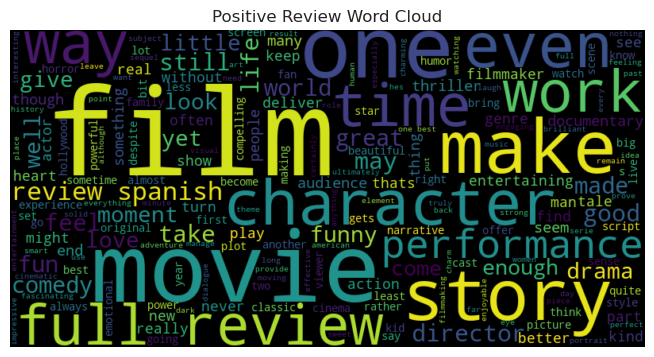

In [23]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=800,height=400).generate(' '.join(positiveR['reviewText']))
plt.imshow(wordcloud_pos,interpolation='bilinear')
plt.title('Positive Review Word Cloud')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

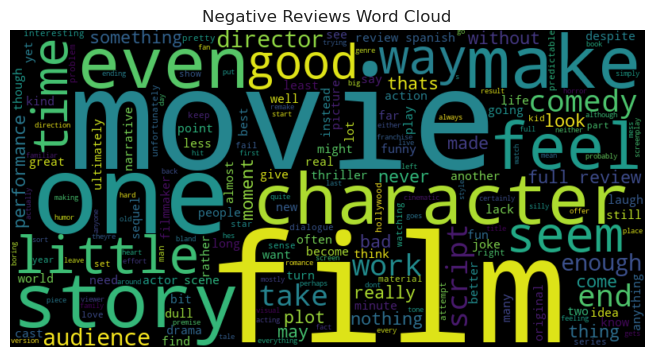

In [24]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
wordcloud_neg = WordCloud(width=800, height=400).generate(' '.join(negativeR['reviewText']))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

# Insight 2 : 
* There is definitely a difference between words used to describe positive and negative reviews 
* But there are some interesting cases which induce some assumptions. 
* There are words which denote positive connotation in negative reviews e.g "good", "best", "nice" etc.
* One possible reason might be the way conversation English is constructed. We often avoid being direct by using phrases like "not so good", "the movie wasn't that nice", "the story wasn't one of the best"

-----------------------------------------------------------------------------------------------------

# 3 . Visualizing distribution of review lengths (number of words)

# A . BOX PLOT 

In [25]:
explorationdf = explorationdf.dropna(subset=['reviewText'])
explorationdf['reviewLen'] = explorationdf['reviewText'].apply(lambda x : len(x.split()))

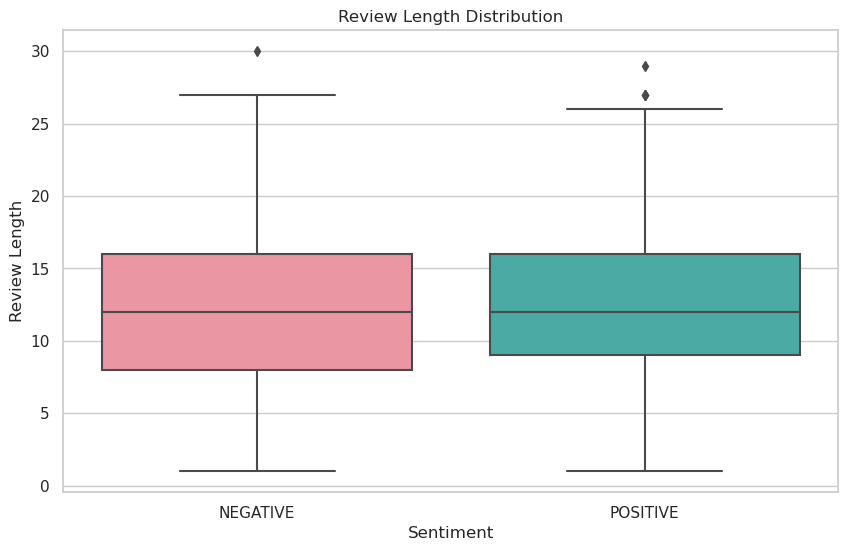

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment',y='reviewLen',data=explorationdf)
plt.title('Review Length Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

# Let us look for a clearer representation

In [27]:
explorationdf['reviewText'] = explorationdf['reviewText'].astype(str)
explorationdf['reviewLen'] = explorationdf['reviewText'].apply(len)
explorationdf.head()

,reviewText,sentiment,reviewLen
516880,love work deniro lawrence ultimately prove old...,NEGATIVE,97
380436,characters plotserving constructs behave ways ...,POSITIVE,82
158575,passionate factbased arguments back brilliant ...,POSITIVE,77
337364,like worlds coolest iphone camera app writ lar...,POSITIVE,105
130816,story young womans uncertain future builds sub...,POSITIVE,111


# B . HISTOGRAM

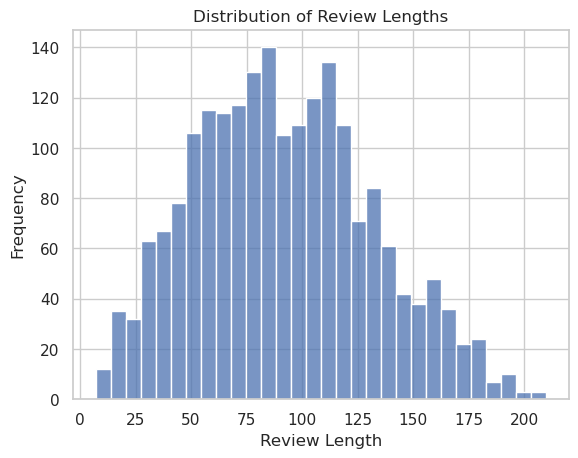

In [28]:
sns.set(style='whitegrid')
sns.histplot(data=explorationdf, x='reviewLen', bins=30)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

# Insight 3 : 
* Reviews with around 100 words have maximum frequency. 
* It appears the distribution is right-skewed. 
* From the box plot, it looks like the data is less dispersed. 

# Using the insights of exploratory data analysis we do the following : 
**Class Imbalance**
* To balance the distribution of labels we use class weights for the models which perform well in terms of training accuracy

**Removing confusing words**
 * We remove certain words which can be confusing for the models. The training dataset has reviews which contain words like "cant", "shouldnt", "wouldnt", "couldnt" etc. These words must be replaced with "can not", "should not", so that they can removed by the preprocessor function. 

# MODEL 1 - LinearSVC ( Linear Support Vector Classifier ) 
* **It is a variant of SVM algorithm for binary classification**
* **Specifically designed for linearly separable data, where it tries to find a hyperplane that best separates the datapoints of different classes**
* **It constructs a linear decision boundary in the feature space that maximizes the margin between the classes**

**LinearSVC has a regularization parameter called "C" that controls the trade-off between maximizing the margin and minimizing the training errors. A smaller value of C allows a wider margin but may lead to more training errors, while a larger value of C enforces stricter classification and may lead to a narrower margin.**

***We will use TF-IDF as a measure of how important a word is in the document. Inverse Document Frequency measures how rare a term is across all documents ( higher the value, rarer the word)***

# Searching for the best hyperparameters of LinearSVC using GridSearchCV

**CREATING A PIPELINE**

In [29]:
# svc_pipeline = Pipeline([
#     ('svc_vectorizer', TfidfVectorizer()),
#     ('svc_classifier', LinearSVC()),
# ])

**DEFINING THE PARAMETER GRID**

In [30]:
# weights = np.linspace(0.05,0.95,20)
# svc_param_grid = {
#     'svc_vectorizer__ngram_range': [(1, 2)],  # Unigrams or bigrams
#     'svc_vectorizer__min_df': [2, 3],             # Minimum document frequency
#     'svc_vectorizer__max_df': [0.9, 1.0],      # Maximum document frequency
#     'svc_classifier__C': [1.0],      # Regularization parameter C
#     'svc_classifier__class_weight' : [{0:x,1:1.0-x} for x in weights]
# }

In [31]:
# svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=3, n_jobs=-1,verbose=3)

In [32]:
# svc_grid_search.fit(x_train, y_train)

In [33]:
# print(svc_grid_search.best_estimator_)

                               
# Best hyperparameters for LinearSVC 

TfidfVectorizer(max_df=0.1,min_df=1,ngram_range=(1,2),binary=False,smooth_idf=True)

LinearSVC(C=1,

          class_weight={0: 0.5236842105263158, 1: 0.47631578947368425},

          dual=False,

          max_iter=2000,

          multi_class='crammer_singer')


In [34]:
# x_trainvec_svc = svc_grid_search.best_estimator_['svc_vectorizer'].fit_transform(x_train)
# x_testvec_svc = svc_grid_search.best_estimator_['svc_vectorizer'].transform(x_test)

In [35]:
# svc_grid_search.best_estimator_['svc_classifier'].fit(x_trainvec_svc,y_train)

In [36]:
# svc_pred = svc_grid_search.best_estimator_['svc_classifier'].predict(x_testvec_svc)

In [37]:
svc_vectorizer = TfidfVectorizer(max_df=0.1,min_df=1,ngram_range=(1,2),binary=False,smooth_idf=True)
svc_classifier = LinearSVC(C=1,penalty='l2',multi_class='crammer_singer',dual=False,max_iter=2000,class_weight = {0: 0.5236842105263158, 1: 0.47631578947368425})

**Since hyperparameter tuning takes a considerable amount of time we will search for them once and note the best parameters and estimator**

Transforming x_train and x_test

In [38]:
x_trainvec_svc = svc_vectorizer.fit_transform(x_train)
x_testvec_svc = svc_vectorizer.transform(x_test)

In [39]:
svc_classifier.fit(x_trainvec_svc,y_train)

LinearSVC(C=1, class_weight={0: 0.5236842105263158, 1: 0.47631578947368425},
          dual=False, max_iter=2000, multi_class='crammer_singer')

In [40]:
svc_pred = svc_classifier.predict(x_testvec_svc)

In [41]:
print("Accuracy of Linear SVC= " , accuracy_score(y_test, svc_pred))
print("Precision of Linear SVC = " ,precision_score(y_test, svc_pred))
print("Recall of Linear SVC= " ,recall_score(y_test, svc_pred))
print("F1 Score of Linear SVC = " ,f1_score(y_test, svc_pred))

Accuracy of Linear SVC=  0.8128707763734847
Precision of Linear SVC =  0.8332739896742033
Recall of Linear SVC=  0.9009624639076035
F1 Score of Linear SVC =  0.8657972623011468


**Accuracy =  0.8128707763734847**

**Precision =  0.8332739896742033**

**Recall =  0.9009624639076035**

**F1 Score =  0.8657972623011468**

In [42]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, svc_pred)
auc_score1 = auc(fpr1, tpr1)

# LinearSVC Training Accuracy - 81.28%

--------------------------------------------------------------------------------------------------------

# Applying preprocessing steps on the testdf

In [43]:
testdf.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [44]:
testdf = testdf[['reviewText']]

In [45]:
testdf['reviewText'] = testdf['reviewText'].fillna('filling Text')
testdf.dropna(subset=['reviewText'])

,reviewText
0,Green slowly cranks up the dread with style an...
1,Philip Noyce's direction is elegant and unforc...
2,It wouldn't do to say what path Maria ultimate...
3,Pig is not exactly the arthouse John Wick that...
4,An imaginative no-budget musical of sorts abou...
...,...
55310,Ron Howard delivers an unconventional romantic...
55311,As an oddball art film that openly invites you...
55312,Nicholson wears his devilish grin from his fir...
55313,It's hard not be entertained by two dozen of C...


In [46]:
testdf['reviewText'] = testdf['reviewText'].apply(preprocessor)
testdf

,reviewText
0,green slowly cranks dread style even occasiona...
1,philip noyces direction elegant unforced willi...
2,wouldnt say path maria ultimately takes wont l...
3,pig exactly arthouse john wick synopsis might ...
4,imaginative nobudget musical sorts male samese...
...,...
55310,ron howard delivers unconventional romantic co...
55311,oddball art film openly invites wonder film la...
55312,nicholson wears devilish grin first scene last...
55313,hard entertained two dozen coles best sung win...


In [47]:
testx = testdf['reviewText']

In [48]:
svc_testx = svc_vectorizer.transform(testx)

In [49]:
svc_prediction = svc_classifier.predict(svc_testx)

--------------------------------------------------------------------------------------------------------

# MODEL 2 - LogisticRegression
* **Provides probability estimates for each class, indicating the likelihood of a given sample belonging to a particular sentiment class.**
* **These probability scores can be threshold to make binary predictions or used to rank and compare different sentiment levels**

**We will do the same thing with Logistic Regression model and the following models as well**

In [50]:
# logreg_pipeline = Pipeline([
#     ('logreg_vectorizer', TfidfVectorizer()),
#     ('logreg', LogisticRegression()),
# ])

In [51]:
# weights = np.linspace(0.05,0.95,20)
# logreg_param_grid = {
#     'logreg_vectorizer__ngram_range': [(1, 2)],     # Unigrams or bigrams
#     'logreg_vectorizer__min_df': [2, 3],                # Minimum document frequency
#     'logreg_vectorizer__max_df': [0.9, 1.0],         # Maximum document frequency
#     'logreg__C': [3.0], # Inverse of regularization strength
#     'logreg__penalty': ['l2'],            # Regularization type
#     'logreg__solver': ['saga','liblinear','newton-cg'],
#     'logreg__class_weight' : [{0:x,1:1.0-x} for x in weights],
#     'logreg__max_iter' : [5000]
# }

In [52]:
# logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=3, n_jobs=-1,verbose=3)

In [53]:
# logreg_grid_search.fit(x_train,y_train)

In [54]:
# print(logreg_grid_search.best_params_)
# print(logreg_grid_search.best_estimator_)

# Best Hyperparameters for Logistic Regression Model
TfidfVectorizer(max_df=0.9,min_df=2,ngram_range=(1,2))

LogisticRegression(C=2.5,

                class_weight={0: 0.5710526315789474, 1: 0.42894736842105263},

                max_iter=5000,

                solver='newton-cg',

                penalty='l2')

In [55]:
logreg_vectorizer = TfidfVectorizer(max_df=0.9,min_df=2,ngram_range=(1,2))
logreg = LogisticRegression(C=2.5, class_weight={0: 0.5710526315789474, 1: 0.42894736842105263}, max_iter=5000, solver='newton-cg',penalty='l2')

In [56]:
x_trainvec_log = logreg_vectorizer.fit_transform(x_train)
x_testvec_log = logreg_vectorizer.transform(x_test)

In [57]:
logreg.fit(x_trainvec_log,y_train)

LogisticRegression(C=2.5,
                   class_weight={0: 0.5710526315789474, 1: 0.42894736842105263},
                   max_iter=5000, solver='newton-cg')

In [58]:
logpred = logreg.predict(x_testvec_log)

In [59]:
pd.crosstab(pd.Series(logpred,name='predicted'),
            pd.Series(y_test,name='Actual'))

Actual,0,1
predicted,,
0,608,1200
1,1478,2955


In [60]:
print("Accuracy of Logistic Regression = " , accuracy_score(y_test, logpred))
print("Precision of Logistic Regression = " ,precision_score(y_test, logpred))
print("Recall of Logistic Regression= " ,recall_score(y_test, logpred))
print("F1 Score of Logistic Regression = " ,f1_score(y_test, logpred))

Accuracy of Logistic Regression =  0.8103881867423265
Precision of Logistic Regression =  0.8377079650029466
Recall of Logistic Regression=  0.8892685274302213
F1 Score of Logistic Regression =  0.8627185508531945


In [61]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, logpred)
auc_score2 = auc(fpr2, tpr2)

In [62]:
# logtestx = logreg_vectorizer.transform(testx)

In [63]:
# log_prediction = logreg.predict(logtestx)

# Logistic Regression Training Accuracy - 81.04%

--------------------------------------------------------------------------------------------------------

# MODEL 3 - MultinomialNaiveBayes

nb_param_grid = {

    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    
    'vectorizer__min_df': [1, 2, 3],             # Minimum document frequency
    
    'vectorizer__max_df': [0.9, 0.95, 1.0],      # Maximum document frequency
    
    'classifier__alpha': [0.1, 0.5, 1.0],        # Smoothing parameter alpha
    
}


Best hyperparameters:
{'classifier__alpha': 1.0, 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 2,

'vectorizer__ngram_range': (1, 2)}

# Using CountVectorizer for MultinomialNaiveBayes

In [64]:
nb_cvectorizer = CountVectorizer(max_df=0.9,min_df=2,ngram_range=(1,2))

In [65]:
x_trainvec_nb = nb_cvectorizer.fit_transform(x_train)
x_testvec_nb = nb_cvectorizer.transform(x_test)

In [66]:
model = MultinomialNB(alpha=1.0)

In [67]:
model.fit(x_trainvec_nb, y_train)

MultinomialNB()

In [68]:
nb_pred = model.predict(x_testvec_nb)

In [69]:
mnb_accuracy = accuracy_score(y_test,nb_pred)
print(mnb_accuracy)

0.804681454733041


In [70]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, nb_pred)
auc_score3 = auc(fpr3, tpr3)

In [71]:
# testx = testdf['reviewText']

In [72]:
# nb_testx = nb_cvectorizer.transform(testx)

In [73]:
# nb_prediction = model.predict(nb_testx)

# Multinomial Naive Bayes Training Accuracy - 80.46% 

--------------------------------------------------------------------------------------------------------

# MODEL 4 - Ridge Classifier


In [74]:
# ridge_pipeline = Pipeline([
#     ('rid_vectorizer', TfidfVectorizer()),
#     ('rid_clf', RidgeClassifier()),
# ])

In [75]:
# weights = np.linspace(0.05,0.95,20)
# ridge_param_grid = {
#     'rid_vectorizer__ngram_range': [(1, 2)],  # Unigrams or bigrams
#     'rid_vectorizer__min_df': [1,2],             # Minimum document frequency
#     'rid_vectorizer__max_df': [0.8,0.9,1],      # Maximum document frequency
#     'rid_clf__alpha': [1.0],
#     'rid_clf__class_weight' : [{0: 0.5710526315789474, 1: 0.42894736842105263}],
#     'rid_clf__solver' : ['lsqr'],
#     'rid_clf__fit_intercept' : [True],
# }

In [76]:
# ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=3, n_jobs=-1,verbose=3)

In [77]:
# ridge_grid_search.fit(x_train, y_train)

In [78]:
# print("Best hyperparameters:")
# print(ridge_grid_search.best_params_)
# print(ridge_grid_search.best_estimator_)

In [79]:
# best_model = ridge_grid_search.best_estimator_
# x_trainvec_rid=best_model['rid_vectorizer'].fit_transform(x_train)
# x_testvec_rid=best_model['rid_vectorizer'].transform(x_test)

In [80]:
# best_model['rid_clf'].fit(x_trainvec_rid,y_train)

In [81]:
# rid_pred = best_model['rid_clf'].predict(x_testvec_rid)
# print(accuracy_score(y_test,rid_pred))

# Best Hyperparameters for RidgeClassifier : 

TfidfVectorizer(max_df=0.1,min_df=1,ngram_range=(1,2))

RidgeClassifier(alpha=0.9,

                class_weight={0: 0.5710526315789474,1: 0.42894736842105263},
                
                solver='saga',
                
                fit_intercept=False)



In [82]:
ridge_vectorizer = TfidfVectorizer(max_df=0.1,min_df=1,ngram_range=(1,2))
x_trainvec_ridge = ridge_vectorizer.fit_transform(x_train)
x_testvec_ridge = ridge_vectorizer.transform(x_test)

In [83]:
ridclf = RidgeClassifier(alpha=0.9,class_weight={0: 0.5710526315789474,1: 0.42894736842105263},solver='saga',fit_intercept=False)

In [84]:
ridclf.fit(x_trainvec_ridge,y_train)

RidgeClassifier(alpha=0.9,
                class_weight={0: 0.5710526315789474, 1: 0.42894736842105263},
                fit_intercept=False, solver='saga')

In [85]:
pred_labels = ridclf.predict(x_testvec_ridge)
accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8127095692545783


In [86]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, pred_labels)
auc_score4 = auc(fpr4, tpr4)

In [87]:
# ridge_testx = ridge_vectorizer.transform(testx)

In [88]:
# rid_prediction = ridclf.predict(ridge_testx)

# Ridge Classifier Training Accuracy - 81.06%

------------------------------------------------------------------------------------------------------

# MODEL 5 - KNN Classifier

In [89]:
# knn_vectorizer = TfidfVectorizer(ngram_range=(1,1),max_df=0.8)
# knn_classifier = KNeighborsClassifier(weights='distance',p=2,n_neighbors=3)

In [90]:
# knn_x_train = knn_vectorizer.fit_transform(x_train)
# knn_x_test = knn_vectorizer.transform(x_test)

In [91]:
# knn_classifier.fit(knn_x_train,y_train)

In [92]:
# knn_pred = knn_classifier.predict(knn_x_test)

In [93]:
# accuracy = accuracy_score(y_test, knn_pred)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

In [94]:
# fpr4, tpr4, thresholds4 = roc_curve(y_test, knn_pred)
# auc_score4 = auc(fpr4, tpr4)

# KNN Accuracy - 34.72%

-------------------------------------------------------------------------------------------------------

# MODEL 6 - SGDClassifier

In [95]:
# from sklearn.linear_model import SGDClassifier

In [96]:
# sgd_pipeline = Pipeline([
#     ('sgd_vectorizer', TfidfVectorizer(max_features=5000)),
#     ('sgd_classifier', SGDClassifier())
# ])

In [97]:
# sgd_param_grid = {
#     'sgd_vectorizer__max_features': [2000, 5000, 10000],       
#     'sgd_classifier__alpha': [0.0001, 0.001, 0.01, 0.1], 
#     'sgd_classifier__class_weight': [None, 'balanced', {0: 0.2, 1: 0.8}]
# }

In [98]:
# sgd_search = GridSearchCV(sgd_pipeline, sgd_param_grid, cv=5, n_jobs=-1, verbose=1)

In [99]:
# sgd_search.fit(x_train, y_train)

In [100]:
# print("Best hyperparameters for SGDClassifier: ", sgd_search.best_params_)

In [101]:
# sgd_preds = sgd_search.predict(x_test)
# sgd_accuracy = accuracy_score(y_test, sgd_preds)
# print("Accuracy: {:.2f}%".format(sgd_accuracy * 100))

Best hyperparameters for SGDClassifier:  {'sgd_classifier__alpha': 0.0001, 'sgd_classifier__class_weight': 'balanced', 'sgd_vectorizer__max_features': 10000}

# SGD Training Accuracy - 76.99%

-------------------------------------------------------------------------------------------------------

# MODEL 7 - Perceptron

In [102]:
# from sklearn.linear_model import Perceptron

In [103]:
# tron_param_grid = {
#     'tron_vectorizer__max_features': [2000, 5000, 10000],  # Number of features for the vectorizer
#     'perceptron__alpha': [0.0001, 0.001, 0.01],       # Learning rate (regularization term) for the Perceptron
#     'perceptron__max_iter': [50, 100, 200]            # Maximum number of iterations for the Perceptron
# }

In [104]:
# tron_pipeline = Pipeline([
#     ('tron_vectorizer', TfidfVectorizer()),
#     ('perceptron', Perceptron())
# ])

In [105]:
# tron_grid_search = GridSearchCV(tron_pipeline, tron_param_grid, cv=5, n_jobs=-1, verbose=3)

In [106]:
# tron_grid_search.fit(x_train, y_train)

In [107]:
# print("Best hyperparameters: ", tron_grid_search.best_params_)

In [108]:
# tron_preds = tron_grid_search.predict(x_test)
# tron_accuracy = accuracy_score(y_test, tron_preds)
# print("Accuracy: {:.2f}%".format(tron_accuracy * 100))

Best hyperparameters:  {'perceptron__alpha': 0.0001, 'perceptron__max_iter': 50, 'tron_vectorizer__max_features': 10000}

# Perceptron Training Accuracy - 74.34%

-------------------------------------------------------------------------------------------------------

# MODEL 8 - Multilayer Perceptron 

In [109]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

In [110]:
# mlpvectorizer = TfidfVectorizer()
# xtrain_mlp = mlpvectorizer.fit_transform(x_train)
# xtest_mlp = mlpvectorizer.transform(x_test)

In [111]:
# mlp.fit(xtrain_mlp, y_train)

In [112]:
# y_pred = mlp.predict(xtest_mlp)
# print(accuracy_score(y_test,y_pred))

In [113]:
# fpr5, tpr5, thresholds4 = roc_curve(y_test, y_pred)
# auc_score5 = auc(fpr5, tpr5)

# MLP Training Accuracy - 0.7671

--------------------------------------------------------------------------------------------------------

# MODEL 9 - Boosting using Adaboost with DecisionTreeClassifier as base classifier

In [114]:
# base_classifier = DecisionTreeClassifier(max_depth=3)
# adaboost = AdaBoostClassifier(estimator=base_classifier, n_estimators=150, random_state=42)


In [115]:
# adaboost_param_grid = {
#     'n_estimators': [50, 100, 150],  # Number of decision stumps in the ensemble
#     'estimator__max_depth': [1, 2, 3],  # Max depth of the decision stumps
# }

In [116]:
# abvec=TfidfVectorizer()
# trainab = abvec.fit_transform(x_train)
# testab = abvec.transform(x_test)

In [117]:
# adaboost_grid_search = GridSearchCV(adaboost, adaboost_param_grid, cv=3, n_jobs=-1, verbose=1)
# adaboost_grid_search.fit(trainab, y_train)

In [118]:
# print(adaboost_grid_search.best_estimator_)
# print(adaboost_grid_search.best_params_)

In [119]:
# adaboost_grid_search.best_estimator_.fit(trainab,y_train)

In [120]:
# ada_pred = adaboost_grid_search.best_estimator_.predict(testab)

In [121]:
# print(accuracy_score(y_test,ada_pred))

# AdaBoost Classifier with DecisionTreeClassifier as base estimator has training accuracy of 0.7518

-------------------------------------------------------------------------------------------------------

# BAGGING using Bagging classifier with DecisionTreeClassifier as base classifier

In [122]:
# estimator = DecisionTreeClassifier()
# dclf = BaggingClassifier(estimator=estimator,n_estimators=10,random_state=42)

In [123]:
# cv = CountVectorizer()
# x_traincount_bag = cv.fit_transform(x_train)
# x_testcount_bag = cv.transform(x_test)

In [124]:
# dclf.fit(x_traincount_bag,y_train)

In [125]:
# d_labels = dclf.predict(x_testcount)

In [126]:
# accuracy = accuracy_score(y_test, d_labels)
# print("Accuracy:", accuracy)

--------------------------------------------------------------------------------------------------------

# COMPARISON OF TOP PERFORMING MODELS

# 1 . *AUC-ROC*

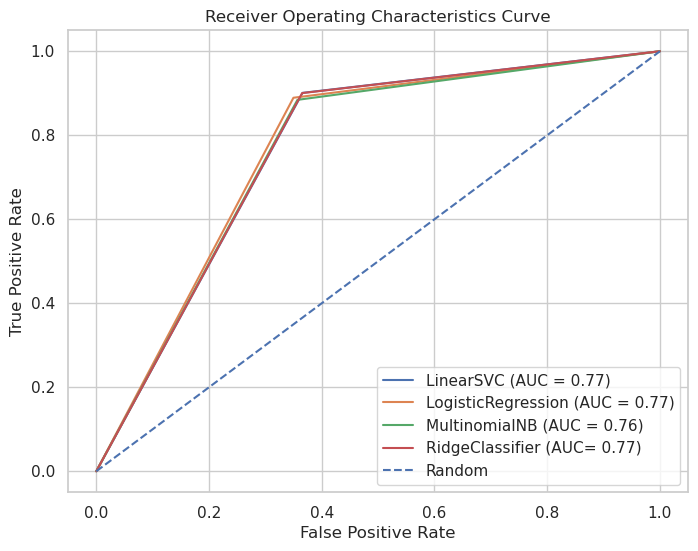

In [127]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f"LinearSVC (AUC = {auc_score1:.2f})")
plt.plot(fpr2, tpr2, label=f'LogisticRegression (AUC = {auc_score2 :.2f})')
plt.plot(fpr3, tpr3, label=f'MultinomialNB (AUC = {auc_score3 :.2f})')
plt.plot(fpr4, tpr4, label=f'RidgeClassifier (AUC= {auc_score4:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='b', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------------

# 2 . *Precision-Recall-Curve*

In [128]:
precision1,recall1,thresholds1 = precision_recall_curve(y_test,svc_pred)
precision2,recall2,thresholds2 = precision_recall_curve(y_test,logpred)
precision3,recall3,thresholds3 = precision_recall_curve(y_test,nb_pred)
precision4,recall4,thresholds4 = precision_recall_curve(y_test,pred_labels)
average_precision1 = average_precision_score(y_test, svc_pred)
average_precision2 = average_precision_score(y_test, logpred)
average_precision3 = average_precision_score(y_test, nb_pred)
average_precision4 = average_precision_score(y_test, pred_labels)

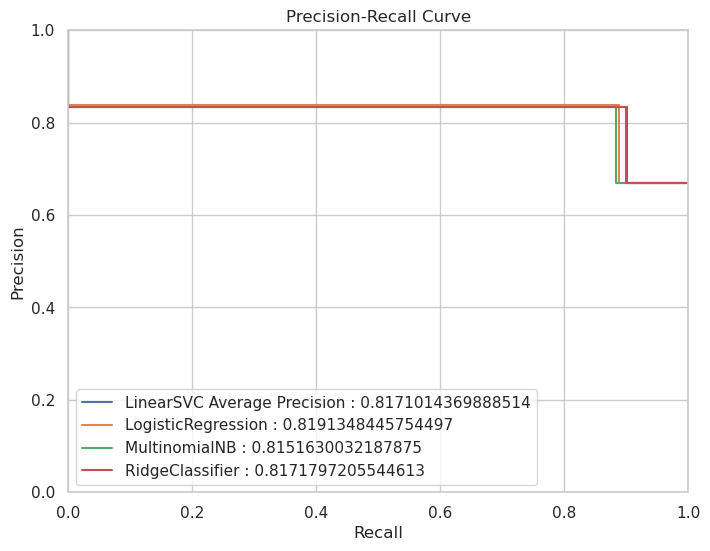

In [129]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.step(recall1, precision1, where='post', label=f'LinearSVC Average Precision : {average_precision1}')
plt.step(recall2, precision2, where='post', label=f'LogisticRegression : {average_precision2}')
plt.step(recall3, precision3, where='post', label=f'MultinomialNB : {average_precision3}')
plt.step(recall4, precision4, where='post', label=f'RidgeClassifier : {average_precision4}')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

--------------------------------------------------------------------------------------------------------

# 3 . *Plotting Confusion Matrices using SNS heatmaps*

In [130]:
class_labels = ['NEGATIVE', 'POSITIVE']
cm1 = confusion_matrix(y_test,svc_pred)
cm2 = confusion_matrix(y_test,logpred)
cm3 = confusion_matrix(y_test,nb_pred)
cm4 = confusion_matrix(y_test,pred_labels)

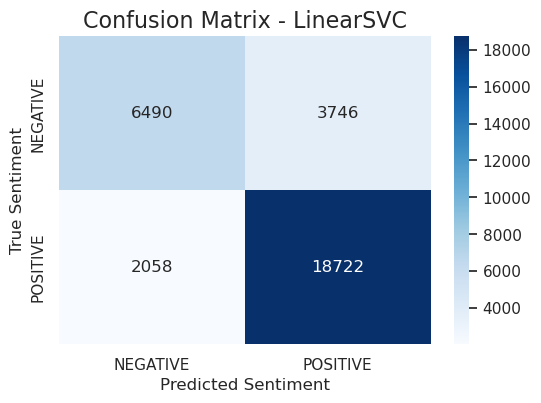

In [131]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - LinearSVC', fontsize=16)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.ylabel('True Sentiment', fontsize=12)
plt.show()

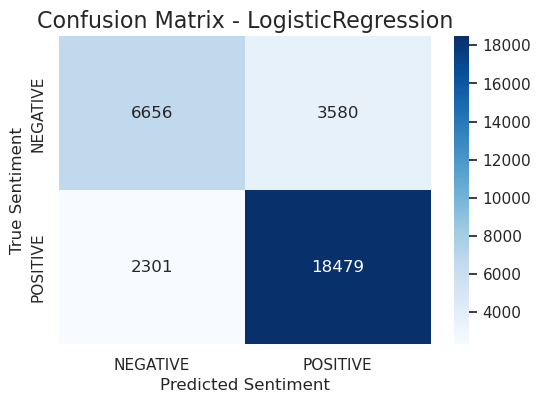

In [132]:
plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - LogisticRegression', fontsize=16)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.ylabel('True Sentiment', fontsize=12)
plt.show()

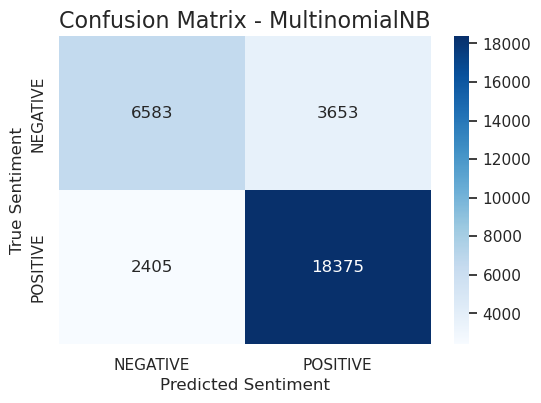

In [133]:
plt.figure(figsize=(6,4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - MultinomialNB', fontsize=16)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.ylabel('True Sentiment', fontsize=12)
plt.show()

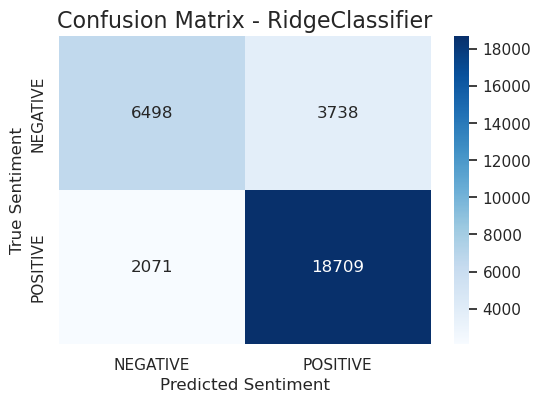

In [134]:
plt.figure(figsize=(6,4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - RidgeClassifier', fontsize=16)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.ylabel('True Sentiment', fontsize=12)
plt.show()

# OBSERVATIONS AND INSIGHTS: 
* **Similar AUCROC and average precision**: The fact that LinearSVC, LogisticRegression, and RidgeClassifier achieved similar AUCROC and average precision indicates that they are all competent models for sentiment analysis


* **Generalization**: These three models (LinearSVC, LogisticRegression, and RidgeClassifier) likely have a good balance of bias and variance, leading to better generalization on unseen data.
* They are less prone to overfitting


* All three models are well-suited for text classification tasks like sentiment analysis. LinearSVC and LogisticRegression are linear models that can handle high-dimensional sparse data, which is typical in text data. RidgeClassifier, a regularized linear model, can also work well with such data, providing a good balance between feature importance and regularization.


* **Efficiency**: These models are computationally efficient, making them faster to train and predict compared to more complex models.


* **MultinomialNB performance**: The slightly lower performance of MultinomialNB could be attributed to the specific characteristics of the model itself. Naive Bayes models assume that the features are conditionally independent, which might not hold true for all text data.


* Even when the data was imbalanced, i.e when class weights weren't used these models performed fairly well.

---------------------------------------------------------------------------------------------------------

# Tailoring the output 

In [135]:
submission = pd.DataFrame(columns=['id','sentiment'])
submission['id'] = [i for i in range(len(svc_prediction))]
submission['sentiment'] = svc_prediction
submission['sentiment'] = submission['sentiment'].map({0:'NEGATIVE',1:'POSITIVE'})

submission

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
...,...,...
55310,55310,POSITIVE
55311,55311,NEGATIVE
55312,55312,NEGATIVE
55313,55313,POSITIVE


In [136]:
submission.to_csv('submission.csv',index=False)

--------------------------------------------------------------------------------------------------------